# This dataset the prices of pizza in Indonesia, but I will change the price to Indian currency (Rupees), then I will predict the prices of pizza

# Columns
- company - The company who produce the pizza
- price_rupiah - The label or target
- diameter - The diameter of pizza in inch
- topping - the topping
- variant - the variant or kind of pizza
- size - size pizza, small, large, extra large, jumbo, etc.
- extra_sauce - yes if we can get an extra sauce, and no if nah
- extra_cheese - yes if we can get an extra chesee, and no if nah
- extra_mushrooms - yes if we can get an extra mushrooms, and no if nah

In [374]:
import numpy as np
import pandas as pd

In [375]:
pizza = pd.read_csv(r'/content/pizza.csv')

In [376]:
pizza.head(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [377]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [378]:
pizza.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [379]:
pizza['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked_beef', 'mozzarella',
       'black_papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [380]:
pizza['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [381]:
pizza['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

# Cleaning
1. Rename "price_rupiah" column to "price"
2. Remove "Rp" from "price" column and convert it to float and change the currency to Indian "Rs"
3. Convert "diameter" column to float
4. Replace '_' with ' ' in "variant" and "topping" column
6. Just keet 3 categories in the "size" column

In [382]:
pizza.rename(columns = {'price_rupiah':'price'}, inplace = True)

In [383]:
pizza["price"] = pizza["price"].str.replace('Rp', '').str.replace(',', '').astype(float)

In [384]:
pizza['price'] = pizza['price']*0.0056

In [385]:
pizza["diameter"] = pizza["diameter"].str.replace(' inch', '').astype(float)

In [386]:
pizza["variant"] = pizza["variant"].str.replace('_', ' ')

In [387]:
pizza["topping"] = pizza["topping"].str.replace('_', ' ')

In [388]:
pizza.groupby(['size']).mean(['price','diameter'])

,price,diameter
size,,
XL,558.880000,17.0
jumbo,939.680000,18.6
large,495.733333,14.0
medium,401.151220,12.0
reguler,587.720000,12.6
small,211.909091,8.5


In [389]:
def sml(x):
    if x<11:
        return 'small'
    elif x>11 and x<16.5:
        return 'medium'
    else:
        return 'large'

pizza['size'] = pizza['diameter'].apply(sml)

In [390]:
pizza.groupby(['size']).mean(['price','diameter'])

,price,diameter
size,,
large,822.304000,18.040000
medium,463.723077,12.871795
small,239.615385,8.423077


In [391]:
pizza['size'].unique()

array(['large', 'medium', 'small'], dtype=object)

In [392]:
pizza.sample(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
93,D,464.8,17.0,chicken,new york,large,no,yes,yes
113,E,257.6,12.0,mozzarella,classic,medium,yes,yes,yes
70,C,218.4,8.5,vegetables,thai veggie,small,no,yes,yes
120,E,403.2,14.0,mozzarella,classic,medium,yes,yes,no
75,C,548.8,14.0,beef,american classic,medium,yes,no,yes


In [393]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price            129 non-null    float64
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(2), object(7)
memory usage: 9.2+ KB


In [394]:
pizza.describe()

,price,diameter
count,129.000000,129.000000
mean,488.046512,12.976744
std,250.354147,3.272674
min,131.600000,8.000000
25%,285.600000,12.000000
50%,436.800000,12.000000
75%,588.000000,14.000000
max,1388.800000,22.000000


# EDA and outlier removal

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Single variable analysis

Text(0, 0.5, 'company')

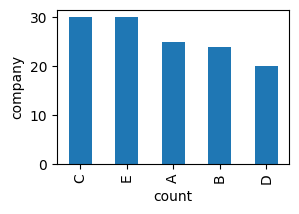

In [396]:
plt.figure(figsize=(3,2))
pizza['company'].value_counts().plot(kind ='bar')
plt.xlabel("count")
plt.ylabel("company")

Text(0, 0.5, 'count')

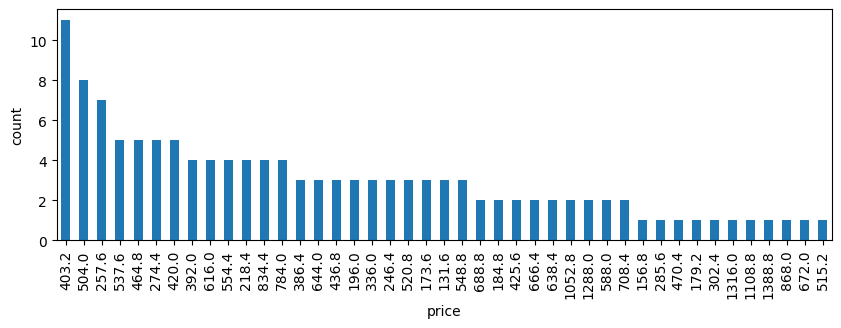

In [397]:
plt.figure(figsize=(10,3))
pizza['price'].value_counts().plot(kind ='bar')
plt.xlabel("price")
plt.ylabel("count")

Text(0, 0.5, 'count')

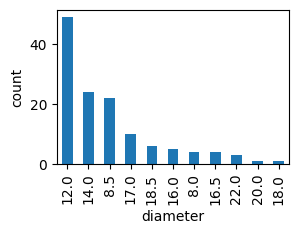

In [398]:
plt.figure(figsize=(3,2))
pizza['diameter'].value_counts().plot(kind ='bar')
plt.xlabel("diameter")
plt.ylabel("count")

Text(0, 0.5, 'count')

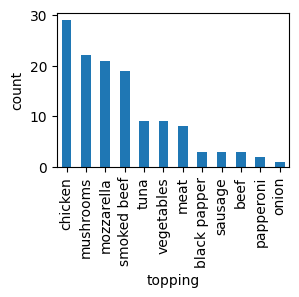

In [399]:
plt.figure(figsize=(3,2))
pizza['topping'].value_counts().plot(kind ='bar')
plt.xlabel("topping")
plt.ylabel("count")

Text(0, 0.5, 'count')

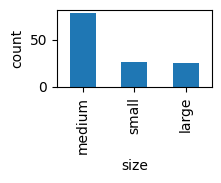

In [400]:
plt.figure(figsize=(2,1))
pizza['size'].value_counts().plot(kind ='bar')
plt.xlabel("size")
plt.ylabel("count")

Text(0, 0.5, 'count')

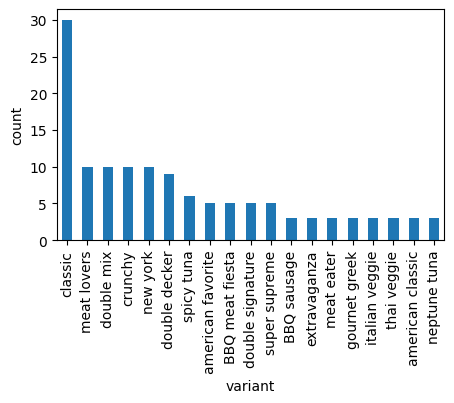

In [401]:
plt.figure(figsize=(5,3))
pizza['variant'].value_counts().plot(kind ='bar')
plt.xlabel("variant")
plt.ylabel("count")

Text(0.5, 1.0, 'Share of extra_sauce')

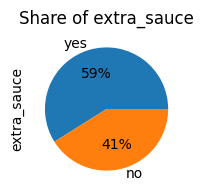

In [402]:
plt.figure(figsize=(2,2))
pizza['extra_sauce'].value_counts().plot(kind ='pie', autopct='%1.0f%%')
plt.title("Share of extra_sauce")

Text(0.5, 1.0, 'Share of extra_cheese')

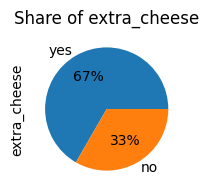

In [403]:
plt.figure(figsize=(2,2))
pizza['extra_cheese'].value_counts().plot(kind ='pie', autopct='%1.0f%%')
plt.title("Share of extra_cheese")

Text(0.5, 1.0, 'Share of extra_mushrooms')

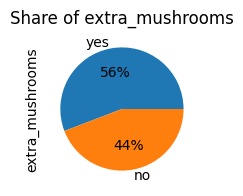

In [404]:
plt.figure(figsize=(2,2))
pizza['extra_mushrooms'].value_counts().plot(kind ='pie', autopct='%1.0f%%')
plt.title("Share of extra_mushrooms")

## 2. Bivariate analysis

Text(0, 0.5, 'price')

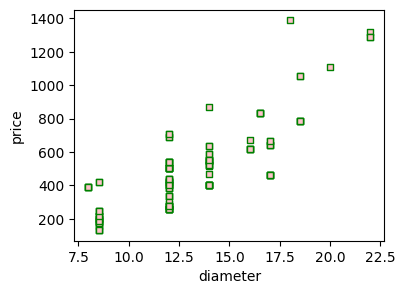

In [405]:
plt.figure(figsize=(4,3))
plt.scatter(pizza['diameter'], pizza['price'], c ="pink", linewidths = 1, marker ="s", edgecolor ="green", s = 20)
plt.xlabel("diameter")
plt.ylabel("price")

In [406]:
pizza[pizza['price']>1300]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1316.0,22.0,chicken,double signature,large,yes,yes,no
4,A,1388.8,18.0,mozzarella,double signature,large,yes,no,yes


<Axes: xlabel='price', ylabel='variant'>

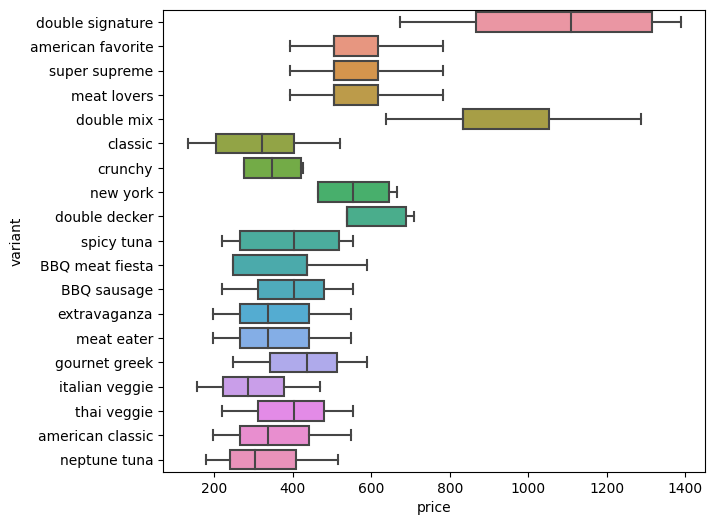

In [407]:
plt.figure(figsize=(7,6))
sns.boxplot(data=pizza, y="variant", x="price")

<Axes: xlabel='price', ylabel='topping'>

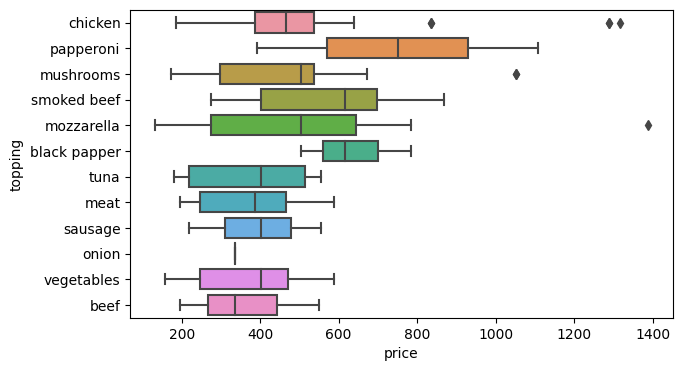

In [408]:
plt.figure(figsize=(7,4))
sns.boxplot(data=pizza, y="topping", x="price")

In [409]:
pizza[(pizza['topping']=="chicken") & (pizza['price']>800)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1316.0,22.0,chicken,double signature,large,yes,yes,no
20,A,1288.0,22.0,chicken,double mix,large,yes,yes,yes
24,A,834.4,16.5,chicken,double mix,large,yes,no,no
84,D,1288.0,22.0,chicken,double mix,large,yes,yes,yes
88,D,834.4,16.5,chicken,double mix,large,yes,no,yes


In [410]:
pizza[(pizza['topping']=="mushrooms") & (pizza['price']>1000)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
21,A,1052.8,18.5,mushrooms,double mix,large,yes,yes,yes
85,D,1052.8,18.5,mushrooms,double mix,large,yes,yes,yes


In [411]:
pizza[(pizza['topping']=="mozzarella") & (pizza['price']>1200)] # remove this outlier

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1388.8,18.0,mozzarella,double signature,large,yes,no,yes


In [412]:
pizza = pizza[~(pizza['topping']=="mozzarella") & ~(pizza['price']>1200)]
pizza

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
1,A,1108.8,20.0,papperoni,double signature,large,yes,yes,no
2,A,672.0,16.0,mushrooms,double signature,medium,yes,yes,yes
3,A,868.0,14.0,smoked beef,double signature,medium,yes,no,yes
5,A,784.0,18.5,black papper,american favorite,large,no,no,yes
6,A,616.0,16.0,smoked beef,american favorite,medium,no,yes,yes
...,...,...,...,...,...,...,...,...,...
124,E,218.4,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,403.2,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,554.4,14.0,tuna,spicy tuna,medium,yes,yes,yes
127,E,246.4,8.5,meat,BBQ meat fiesta,small,yes,no,yes


<Axes: xlabel='price', ylabel='size'>

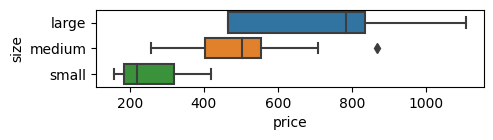

In [413]:
plt.figure(figsize=(5,1))
sns.boxplot(data=pizza, y="size", x="price")

In [414]:
pizza[(pizza['size']=="small") & (pizza['price']>300)] 

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
7,A,392.0,8.0,papperoni,american favorite,small,no,no,yes
12,A,392.0,8.0,smoked beef,super supreme,small,yes,yes,no
17,A,392.0,8.0,chicken,meat lovers,small,yes,yes,yes
43,B,420.0,8.5,smoked beef,classic,small,yes,yes,no
81,D,392.0,8.0,chicken,meat lovers,small,yes,yes,no
118,E,420.0,8.5,smoked beef,classic,small,yes,yes,no


In [415]:
pizza[(pizza['size']=="medium") & (pizza['price']>700)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
3,A,868.0,14.0,smoked beef,double signature,medium,yes,no,yes
42,B,708.4,12.0,smoked beef,double decker,medium,yes,no,no
117,E,708.4,12.0,smoked beef,double decker,medium,yes,no,no


<Axes: xlabel='diameter', ylabel='size'>

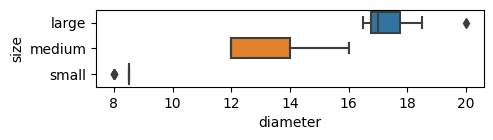

In [416]:
plt.figure(figsize=(5,1))
sns.boxplot(data=pizza, y="size", x="diameter")

In [417]:
pizza[pizza['diameter']==8]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
7,A,392.0,8.0,papperoni,american favorite,small,no,no,yes
12,A,392.0,8.0,smoked beef,super supreme,small,yes,yes,no
17,A,392.0,8.0,chicken,meat lovers,small,yes,yes,yes
81,D,392.0,8.0,chicken,meat lovers,small,yes,yes,no


In [418]:
pizza[pizza['diameter']==20]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
1,A,1108.8,20.0,papperoni,double signature,large,yes,yes,no


# Model building

In [419]:
X = pizza.drop('price', axis=1)
y = pizza['price']

In [420]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [421]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X[["company", "topping", "variant", "size", "extra_sauce", "extra_cheese", "extra_mushrooms"]])

OneHotEncoder()

In [422]:
from sklearn.compose import make_column_transformer

col_trans =  make_column_transformer((OneHotEncoder(categories=ohe.categories_), ["company", "topping", "variant", "size", "extra_sauce", "extra_cheese", "extra_mushrooms"]),
                                     remainder='passthrough')

In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [424]:
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

In [425]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(col_trans, lr)
pipe_svr = make_pipeline(col_trans, svr)
pipe_rfr = make_pipeline(col_trans, rfr)
pipe_gbr = make_pipeline(col_trans, gbr)
pipe_xgb = make_pipeline(col_trans, xgb)

In [426]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
                                                                            array(['beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion',
       'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'],
      dtype=object),
                                                                            array(['BBQ meat fiesta', 'BBQ sausage', '...
       'italian veggie', 'meat eater', 'meat lovers', 'neptune tuna',
       'new york', 'spicy tuna', 'super supreme', 'thai veggie'],
      dtype=object),
                                                                            array(['large', 'medium', 'small'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['company', 'topping',
                                                   'variant', 'size',
                                                   'extra_sauce',
                                                   'extra_cheese',
                                                   'extra_mushrooms'])])),
                ('linearregression', LinearRegression())])

In [427]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
                                                                            array(['beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion',
       'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'],
      dtype=object),
                                                                            array(['BBQ meat fiesta', 'BBQ sausage', '...
       'italian veggie', 'meat eater', 'meat lovers', 'neptune tuna',
       'new york', 'spicy tuna', 'super supreme', 'thai veggie'],
      dtype=object),
                                                                            array(['large', 'medium', 'small'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['company', 'topping',
                                                   'variant', 'size',
                                                   'extra_sauce',
                                                   'extra_cheese',
                                                   'extra_mushrooms'])])),
                ('svr', SVR())])

In [428]:
pipe_rfr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
                                                                            array(['beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion',
       'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'],
      dtype=object),
                                                                            array(['BBQ meat fiesta', 'BBQ sausage', '...
       'new york', 'spicy tuna', 'super supreme', 'thai veggie'],
      dtype=object),
                                                                            array(['large', 'medium', 'small'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['company', 'topping',
                                                   'variant', 'size',
                                                   'extra_sauce',
                                                   'extra_cheese',
                                                   'extra_mushrooms'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [429]:
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
                                                                            array(['beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion',
       'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'],
      dtype=object),
                                                                            array(['BBQ meat fiesta', 'BBQ sausage', '...
       'new york', 'spicy tuna', 'super supreme', 'thai veggie'],
      dtype=object),
                                                                            array(['large', 'medium', 'small'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['company', 'topping',
                                                   'variant', 'size',
                                                   'extra_sauce',
                                                   'extra_cheese',
                                                   'extra_mushrooms'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [430]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
                                                                            array(['beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion',
       'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'],
      dtype=object),
                                                                            array(['BBQ meat fiesta', 'BBQ sausage', '...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [431]:
y_pred_lr=pipe_lr.predict(X_test)
y_pred_svr=pipe_svr.predict(X_test)
y_pred_rfr=pipe_rfr.predict(X_test)
y_pred_gbr=pipe_gbr.predict(X_test)
y_pred_xgb=pipe_xgb.predict(X_test)

In [432]:
from sklearn.metrics import r2_score

score_lr = r2_score(y_test, y_pred_lr)
score_svr = r2_score(y_test, y_pred_svr)
score_rfr = r2_score(y_test, y_pred_rfr)
score_gbr = r2_score(y_test, y_pred_gbr)
score_xgb = r2_score(y_test, y_pred_xgb)

In [433]:
mod = [['Linear Regression', score_lr], 
       ['S V R', score_lr], 
       ['Random Forest', score_rfr], 
       ['Gradient Boosting', score_gbr], 
       ['X G B', score_xgb]]
models = pd.DataFrame(mod, columns=['model', 'score'])

models

,model,score
0,Linear Regression,0.741144
1,S V R,0.741144
2,Random Forest,0.956449
3,Gradient Boosting,0.978769
4,X G B,0.976769


In [434]:
# we can see gradient boosting model is the best one 

import pickle

pickle.dump(pipe_gbr, open('GradientBoostingModel.pkl','wb'))

In [438]:
np.round(pipe_gbr.predict(pd.DataFrame([['A',	'16.0',	'mushrooms',	'double signature',	'medium',	'yes',	'yes',	'yes']], 
                                       columns=['company', 'diameter', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms'])),2)

array([683.01])

In [436]:
pizza.head(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
1,A,1108.8,20.0,papperoni,double signature,large,yes,yes,no
2,A,672.0,16.0,mushrooms,double signature,medium,yes,yes,yes
3,A,868.0,14.0,smoked beef,double signature,medium,yes,no,yes
5,A,784.0,18.5,black papper,american favorite,large,no,no,yes
6,A,616.0,16.0,smoked beef,american favorite,medium,no,yes,yes


#Values of the categorical columns

- company - 'A', 'B', 'C', 'D', 'E'

- topping - 'beef', 'black papper', 'chicken', 'meat', 'mushrooms', 'onion', 'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'

- variant - BBQ meat fiesta', 'BBQ sausage', 'american classic', 'american favorite', 'classic', 'crunchy', 'double decker', 'double mix', 'double signature', 'extravaganza', 'gournet greek', 'italian veggie', 'meat eater', 'meat lovers', 'neptune tuna', 'new york', 'spicy tuna', 'super supreme', 'thai veggie'

- size - 'large', 'medium', 'small'

- extra_sauce - 'no', 'yes'

- extra_cheese - 'no', 'yes'

- extra_mushrooms - 'no', 'yes'